# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [4]:
import pandas as pd

In [5]:
dados = pd.read_csv('/content/emp_automovel.csv')
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [6]:
y = dados['inadimplente']
X = dados.drop('inadimplente', axis=1)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
modelo = DecisionTreeClassifier()
modelo.fit(X,y)


DecisionTreeClassifier()

In [9]:
print(f'Acurácia: {modelo.score(X,y)}')

Acurácia: 1.0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X, X_test, y, y_test = train_test_split(X,y,test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X,y, stratify=y, random_state=5)

In [22]:
modelo = DecisionTreeClassifier(max_depth = 10)
forest = RandomForestClassifier(max_depth = 10)
modelo.fit(X_train,y_train)
forest.fit(X_train,y_train)
print(f'Acurácia de treino: {modelo.score(X_train, y_train)}')
print(f'Acurácia de validação: {modelo.score(X_val,y_val)}')
print(f'Acurácia de treino Forest: {modelo.score(X_train, y_train)}')
print(f'Acurácia de validação Forest: {modelo.score(X_val,y_val)}')

Acurácia de treino: 0.9206445993031359
Acurácia de validação: 0.9057573382109573
Acurácia de treino Forest: 0.9206445993031359
Acurácia de validação Forest: 0.9057573382109573


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [24]:
y_previsto = modelo.predict(X_val)
y_previsto_forest = forest.predict(X_val)
matriz_confusao = confusion_matrix(y_val,y_previsto)
matriz_confusao_forest = confusion_matrix(y_val,y_previsto_forest)
print(matriz_confusao)
print('\n',matriz_confusao_forest)

[[10356   123]
 [  959    43]]

 [[10479     0]
 [ 1000     2]]


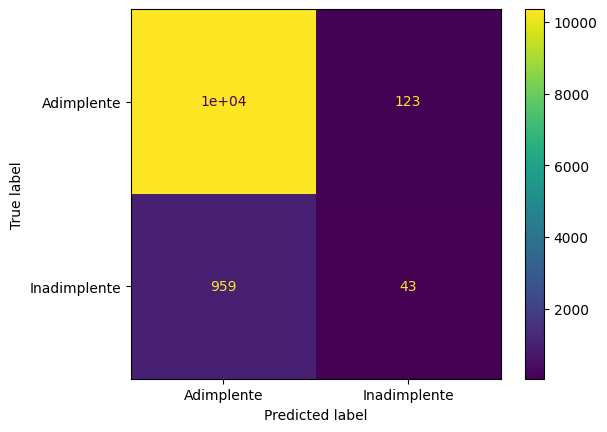

In [25]:
visu = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=['Adimplente','Inadimplente'])
visu.plot();

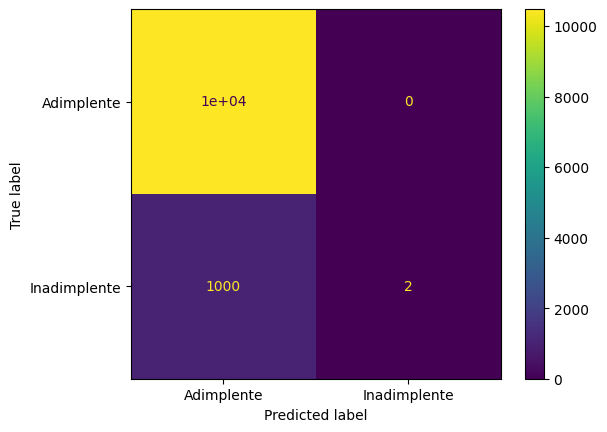

In [26]:
visu = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao_forest, display_labels=['Adimplente','Inadimplente'])
visu.plot();

# Métricas de avaliação

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
print(f'Acurácia: {accuracy_score(y_val,y_previsto)}')

Acurácia: 0.9057573382109573


In [31]:
print(f'Precisão: {precision_score(y_val,y_previsto)}')
print(f'Recall: {recall_score(y_val,y_previsto)}')

Precisão: 0.25903614457831325
Recall: 0.04291417165668663


In [33]:
print(f'F1-Score:{f1_score(y_val,y_previsto)}')

F1-Score:0.07363013698630137


In [34]:
from sklearn.metrics import RocCurveDisplay

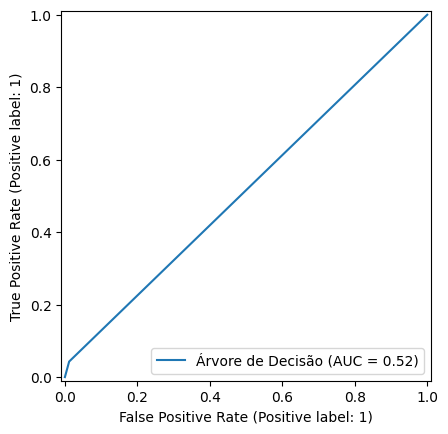

In [35]:
RocCurveDisplay.from_predictions(y_val,y_previsto, name = 'Árvore de Decisão');

In [36]:
from sklearn.metrics import roc_auc_score

In [37]:
print(f'AUC: {roc_auc_score(y_val,y_previsto)}')

AUC: 0.5155882052099636


In [40]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

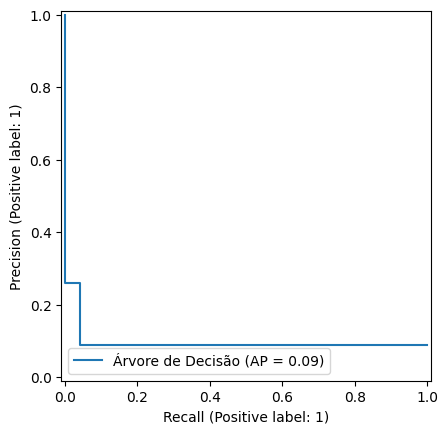

In [39]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto, name = 'Árvore de Decisão');

In [41]:
print(f'AP: {average_precision_score(y_val,y_previsto)}')

AP: 0.09464563086733557


In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481

